In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [2]:
df=pd.read_csv('C:/Users/lenovo/Downloads/kc_house_data.csv')

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
 df.head(69)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


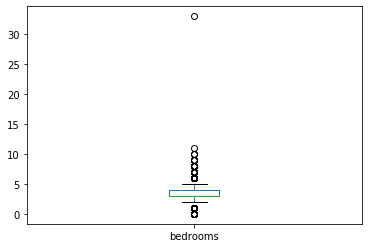

In [5]:
df['bedrooms'].plot.box()

In [6]:
df=df[df.bedrooms != 33]


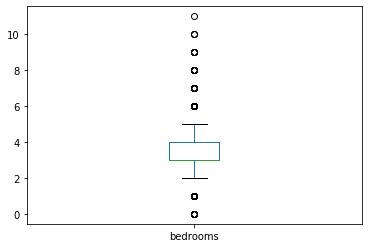

In [7]:
df['bedrooms'].plot.box()

In [8]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

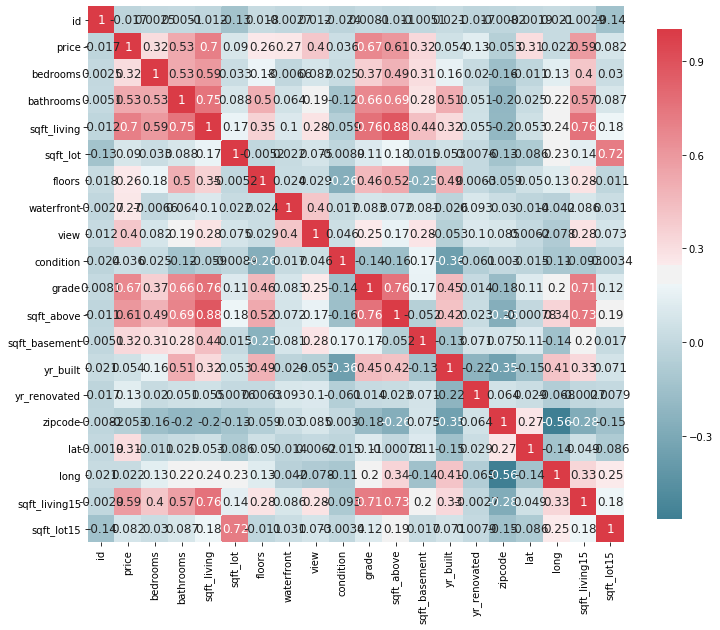

In [9]:
plot_correlation_map(df)


here we can clearly see that some features have a strong correlation with our target price such as sqft_living ,grade and bathrooms we can see also that some feature have stong but negative correlation with price feature

In [10]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702047
grade            0.667447
sqft_above       0.605591
sqft_living15    0.585404
bathrooms        0.525147
view             0.397299
sqft_basement    0.323812
bedrooms         0.315445
lat              0.306998
waterfront       0.266371
floors           0.256811
yr_renovated     0.126437
sqft_lot         0.089664
sqft_lot15       0.082451
yr_built         0.054023
condition        0.036336
long             0.021637
id              -0.016753
zipcode         -0.053209
Name: price, dtype: float64

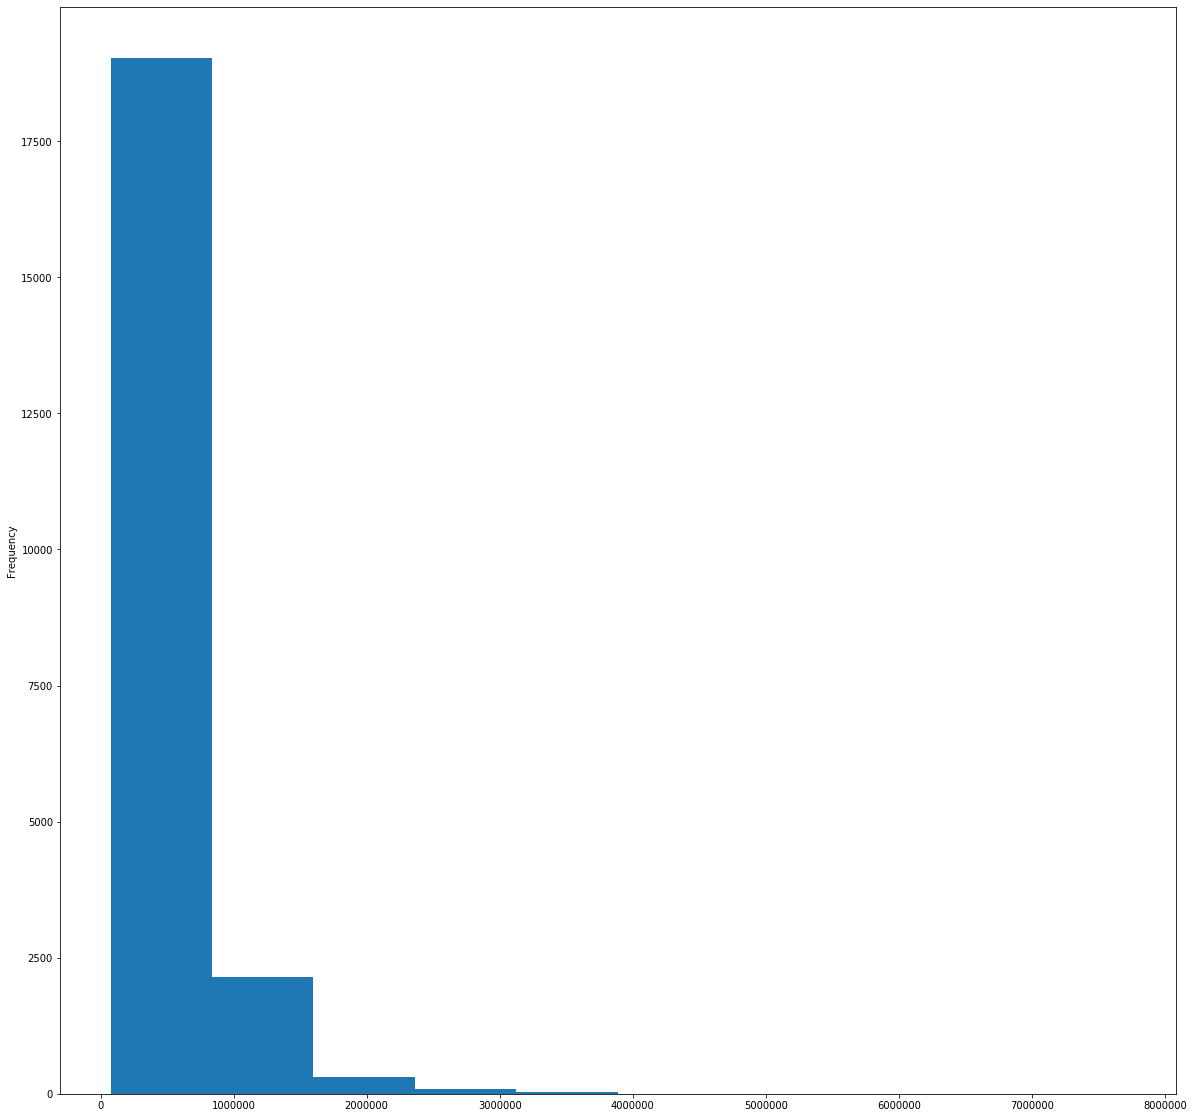

In [11]:
plt.figure(figsize=(20,20))
df['price'].plot.hist()


Text(0.5, 1.0, 'sqft_basement')

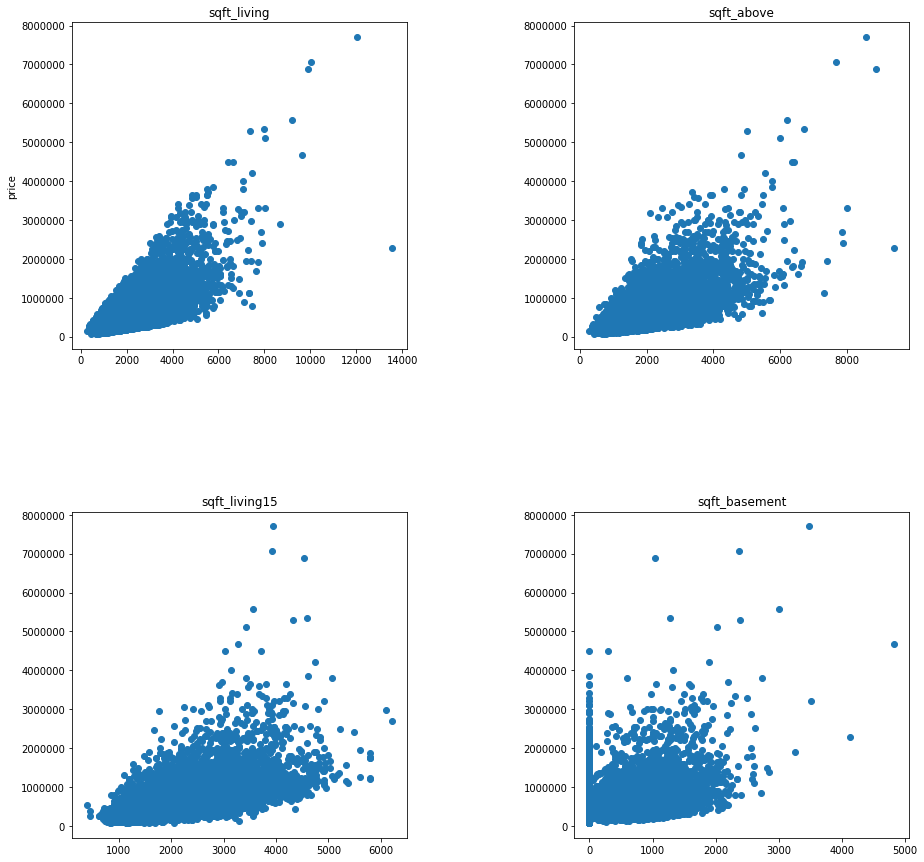

In [12]:
import seaborn as sns
fig=plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

plt.subplots_adjust(wspace=0.5, hspace=0.5)

ax1=fig.add_subplot(221)
ax1.scatter(x=df["sqft_living"],y=df["price"])
ax1.set_title('sqft_living')
ax1.set_ylabel("price")

ax2=fig.add_subplot(222)
ax2.scatter(x=df["sqft_above"], y=df["price"])
ax2.set_title('sqft_above')

ax3=fig.add_subplot(223)
ax3.scatter(x=df["sqft_living15"], y=df["price"])
ax3.set_title('sqft_living15')

ax4=fig.add_subplot(224)
ax4.scatter(x=df["sqft_basement"], y=df["price"])
ax4.set_title('sqft_basement')

we can notice that most of the houses sqft living is under 6000
we can notice also that the more the sqft living decrises the more the price is high


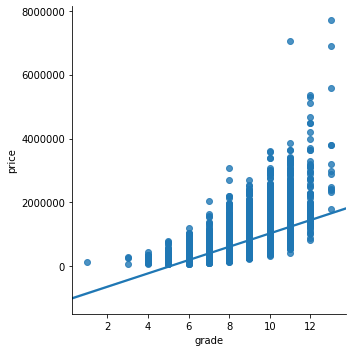

In [13]:
import seaborn as sns
sns.lmplot(x="grade",y="price",data=df)

here we can see that grade and price have a positive correlation
if the house have more grades the price will be higher

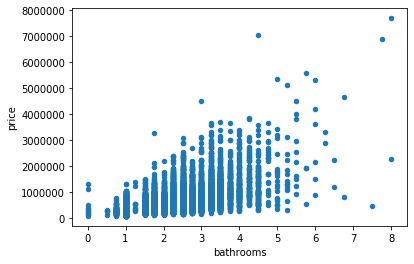

In [14]:
df['bedrooms']=round(df['bedrooms'])
df.plot.scatter(x="bathrooms",y="price")

we can conclude that houses with more bathrooms will have a higher price

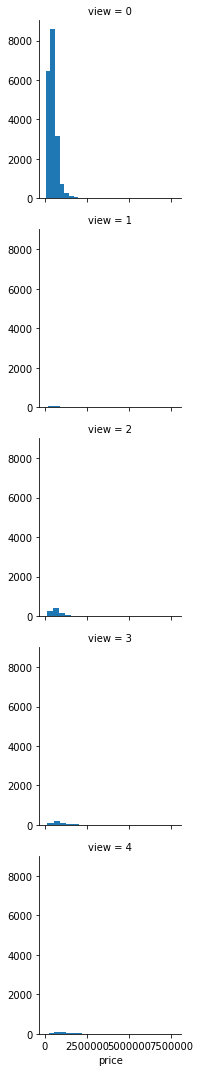

In [15]:
g=sns.FacetGrid(df,row="view")
g.map(plt.hist,'price',bins=20)

here we can see that most of the houses have no view
here we can see that houses with views between 4 and 6 have the highest prices

In [16]:
(df[['zipcode','price']].groupby('zipcode').mean()).sort_values('price',ascending=False)

,price
zipcode,
98039,2.160607e+06
98004,1.355927e+06
98040,1.194230e+06
98112,1.095499e+06
98102,9.012583e+05
98109,8.796236e+05
98105,8.628252e+05
98006,8.596848e+05
98119,8.494480e+05


In [17]:
#houses with the zip code 98039 have the highest price

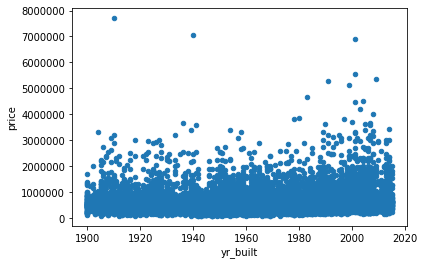

In [18]:
df.plot.scatter(x="yr_built",y="price")

according to this visualization the highet price is the price of a house built between 1900 and 1920

MSE: 67376660439.815346
R squared: 0.4909326042545674


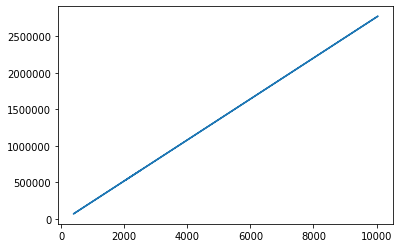

In [19]:
x=df["sqft_living"].values
y=df["price"].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.35,random_state=30)
x_train= x_train.reshape(-1, 1)
y_train= y_train.reshape(-1,1)
x_test = x_test.reshape(-1, 1)


model=LinearRegression()
model.fit(x_train,y_train)
predicted=model.predict(x_test)

plt.plot(x_test,predicted)

print("MSE:",metrics.mean_squared_error(y_test,predicted))
print("R squared:",metrics.r2_score(y_test,predicted))

Rsuared=0.5 : half of the output can be explained by the model of the input

In [20]:
a=model.coef_
print (a)
b=model.intercept_
print (b)


[[280.81535979]]
[-43309.4051224]


the coef a is the slope of the line,it controls its 'steepness'. A positive value has the slope going up to the right. A negative slope goes down to the right.
the coef b is the y-intercept wich is the variation of the x divided by the variation of the y , we can say that if the sqft_living increases by 1 square foot the price will increase with 185...

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
x1=df[['sqft_living','grade']].values
y1=df['price'].values
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=40)
 


model=LinearRegression()
model.fit(x_train1,y_train1)



(17289, 2)
(17289,)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

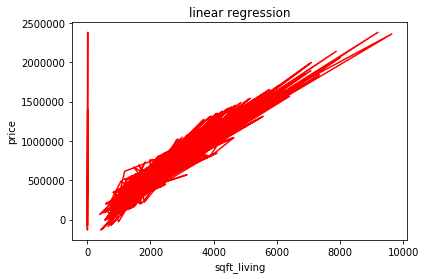

MSE= 58579644056.88928
R squared= 0.5425870196570766


-615514.9349797823

In [36]:
predicted1=model.predict(x_test1)
plt.title("linear regression")
plt.ylabel("price") 
plt.xlabel("sqft_living")
plt.plot(x_test1,model.predict(x_test1),color='r')
plt.show()

print("MSE=",metrics.mean_squared_error(y_test1,predicted1))
print("R squared=",metrics.r2_score(y_test1,predicted1))

model.coef_
model.intercept_

In [54]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
x2=df[['sqft_living','grade','sqft_above']]
y2=df['price'].values

x_train2,x_test2,y_train2,y_test2=train_test_split(x2,y2,test_size=0.20,random_state=40)

In [55]:
lg=LinearRegression()
poly=PolynomialFeatures(degree=2)
x_=poly.fit_transform(x_train2)
lg.fit(x_,y_train2)
x_test_fit=poly.fit_transform(x_test2)
predicted2=lg.predict(x_test_fit)

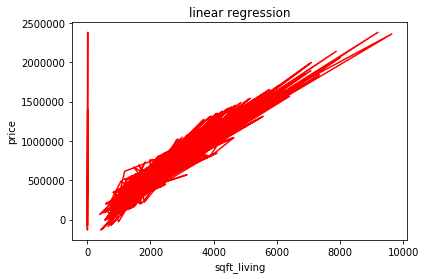

MSE= 58579644056.88928
R squared= 0.5425870196570766


-615514.9349797823

In [56]:
plt.title("linear regression")
plt.ylabel("price") 
plt.xlabel("sqft_living")
plt.plot(x_test1,model.predict(x_test1),color='r')
plt.show()

print("MSE=",metrics.mean_squared_error(y_test1,predicted1))
print("R squared=",metrics.r2_score(y_test1,predicted1))

model.coef_
model.intercept_